In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
file_path = '../Data/Folkhalsomyndigheten_Covid19.xlsx'
total_cases = pd.read_excel(file_path, sheet_name='Totalt antal per åldersgrupp')


dict = {
    'info': total_cases.info(),
    'head': total_cases.head(12),
    'describe': total_cases.describe(include='all'),
    'col': total_cases.columns,
    'index': total_cases.index
}
dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Åldersgrupp                   11 non-null     object
 1   Totalt_antal_fall             11 non-null     int64 
 2   Totalt_antal_intensivvårdade  11 non-null     int64 
 3   Totalt_antal_avlidna          11 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 484.0+ bytes


{'info': None,
 'head':        Åldersgrupp  Totalt_antal_fall  Totalt_antal_intensivvårdade  \
 0        Ålder_0_9             138071                           109   
 1      Ålder_10_19             355823                           101   
 2      Ålder_20_29             418506                           285   
 3      Ålder_30_39             493443                           492   
 4      Ålder_40_49             474702                           997   
 5      Ålder_50_59             378468                          1932   
 6      Ålder_60_69             180079                          2595   
 7      Ålder_70_79              87096                          2394   
 8      Ålder_80_89              58170                           612   
 9    Ålder_90_plus              26677                            21   
 10  Uppgift saknas                545                             6   
 
     Totalt_antal_avlidna  
 0                     17  
 1                      9  
 2                     41  

###

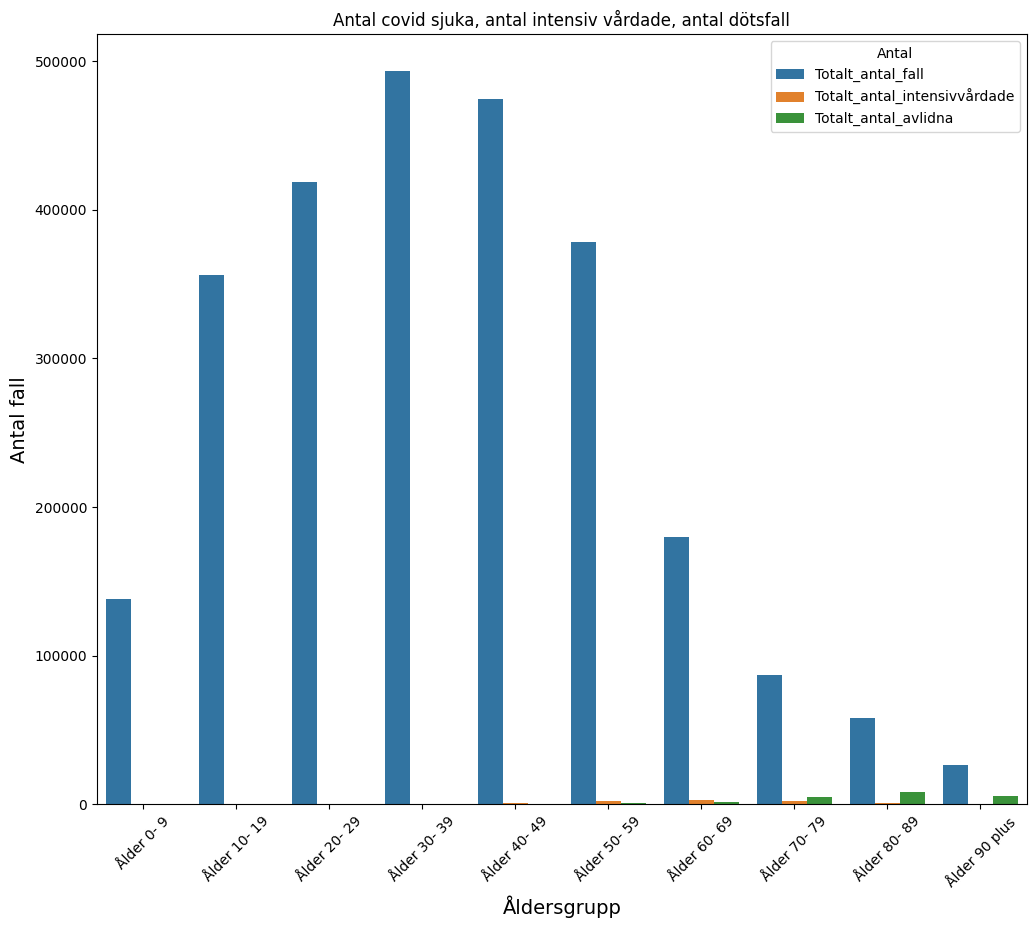

In [60]:
grouped_data = total_cases.groupby('Åldersgrupp').sum()

plt.figure(figsize=(12, 10))
grouped_data = grouped_data[['Totalt_antal_fall', 'Totalt_antal_intensivvårdade', 'Totalt_antal_avlidna']]

grouped_data = grouped_data.reset_index()

grouped_data = grouped_data.drop(grouped_data.index[0])

def rename_age_group(age_group):
    if age_group.endswith('_plus'):
        return age_group.replace('_', ' ')
    else:
        return age_group.replace('_', ' ').replace(' 0', ' 0-').replace(' 10', ' 10-').replace(' 20', ' 20-').replace(' 30', ' 30-').replace(' 40', ' 40-').replace(' 50', ' 50-').replace(' 60', ' 60-').replace(' 70', ' 70-').replace(' 80', ' 80-').replace(' 90', ' 90-')
    
grouped_data['Åldersgrupp'] = grouped_data['Åldersgrupp'].apply(rename_age_group)


melted_data = grouped_data.melt(id_vars=['Åldersgrupp'], var_name='sjuka', value_name='antal fall',)


sns.barplot(x='Åldersgrupp', hue='sjuka', y='antal fall', data=melted_data,)
plt.title('Antal covid sjuka, antal intensiv vårdade, antal dötsfall')
plt.ylabel('Antal fall', fontsize=14)
plt.xlabel('Åldersgrupp', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Antal')

plt.savefig("../Data/Visualizeringar/Covid_sick_intensive_care_deaths.png")

plt.show()


In [68]:
def fun(grouped_data):
    grouped_data['Mortality Rate among Hospitalized (%)'] = (grouped_data['Totalt_antal_avlidna'] / grouped_data['Totalt_antal_intensivvårdade']) * 100
        
    grouped_data['Mortality Rate among Hospitalized (%)'] = grouped_data['Mortality Rate among Hospitalized (%)'].apply(lambda x: min(x, 100)).round(2)
    
    return grouped_data


grouped_data['Hospitalization Rate (%)'] = ((grouped_data['Totalt_antal_intensivvårdade'] / grouped_data['Totalt_antal_fall']) * 100).round(2)
grouped_data['Mortality Rate among all Covid-cases (%)'] = ((grouped_data['Totalt_antal_avlidna'] / grouped_data['Totalt_antal_fall']) * 100).round(3)
grouped_data = fun(grouped_data)

grouped_data


,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Hospitalization Rate (%),Mortality Rate among Hospitalized (%),Mortality Rate among all Covid-cases (%)
1,Ålder 0- 9,138071,109,17,0.08,15.60,0.012
2,Ålder 10- 19,355823,101,9,0.03,8.91,0.003
3,Ålder 20- 29,418506,285,41,0.07,14.39,0.010
4,Ålder 30- 39,493443,492,71,0.10,14.43,0.014
5,Ålder 40- 49,474702,997,172,0.21,17.25,0.036
6,Ålder 50- 59,378468,1932,523,0.51,27.07,0.138
7,Ålder 60- 69,180079,2595,1422,1.44,54.80,0.790
8,Ålder 70- 79,87096,2394,4654,2.75,100.00,5.344
9,Ålder 80- 89,58170,612,8326,1.05,100.00,14.313
10,Ålder 90 plus,26677,21,5420,0.08,100.00,20.317
